In [1]:
import os

In [2]:
os.getcwd()

'/content'

In [3]:
os.chdir('/content/drive/My Drive/Colab Notebooks/NLP/BERT')

#import data from kaggle on Google Colab by using Kaggle API

In [ ]:
!pip install -q kaggle 

In [ ]:
!pip install -q kaggle-cli 

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 5.3MB 9.5MB/s 
     |████████████████████████████████| 112kB 49.9MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 133kB 49.1MB/s 


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


#downloading data from kaggle competition to Google Drive

In [ ]:

!kaggle competitions download -c twitter-sentiment-analysis2

 82% 9.00M/11.0M [00:00<00:00, 24.9MB/s]
100% 11.0M/11.0M [00:00<00:00, 24.7MB/s]
  0% 0.00/3.67M [00:00<?, ?B/s]
100% 3.67M/3.67M [00:00<00:00, 122MB/s]


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


#Importing Data

In [4]:
import numpy as np
import pandas as pd


In [5]:
df=pd.read_csv('train.csv',encoding='latin-1',header=None)

In [6]:
df.head()

,0,1,2
0,ItemID,Sentiment,SentimentText
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


# Data Augmentation

In [7]:
df[2][0]='I am not feeling good here.'

In [8]:
df[1][0]='0'
df[0][0]=0

In [9]:
df.head()

,0,1,2
0,0,0,I am not feeling good here.
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


In [10]:
df1=df.copy()

In [11]:
df.columns=['Id','Sentiment','Tweet_text']

In [12]:
df.head()

,Id,Sentiment,Tweet_text
0,0,0,I am not feeling good here.
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          99990 non-null  object
 1   Sentiment   99990 non-null  object
 2   Tweet_text  99990 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [14]:
df.head()

,Id,Sentiment,Tweet_text
0,0,0,I am not feeling good here.
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


#Cleaning Text

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
def clean_text(data,col):
  corpus=[]
  for i in range(len(data[col])):
    text=re.sub(r'http\S+', ' ', data[col][i])
    text=text.lower()
    text=re.sub(r"that's","that is",text)
    text = re.sub(r"there's","there is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"where's","where is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"who's","who is",text)
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"they're","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain't","am not",text)
    text = re.sub(r"wouldn't","would not",text)
    text = re.sub(r"shouldn't","should not",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"couldn't","could not",text)
    text = re.sub(r"won't","will not",text)
    text=re.sub(r'[@#\$%&\*\(\)\<\>\?\!\;\'\\-\_"]',' ',text)
    text= re.sub(r'\W',' ',text)
    text=re.sub(r'\d',' ',text)
    text=re.sub(r'^[a-z]\s',' ',text)
    text=re.sub(r'\s+[a-z]\s+',' ',text)
    text=re.sub(r'\s+[a-z]$',' ',text)
    text=re.sub(r'\s+',' ',text)
    corpus.append(text)
  return corpus

In [17]:
df['Tweet_text']=clean_text(df,'Tweet_text')

In [18]:
def remove_stopword(data,col):
  corpus=[]
  s=set(stopwords.words('english'))
  s1=['not','or','no','nor']
  for i in s1:
    if i in s:
      s.remove(i)
  for i in range(len(data[col])):
    words = nltk.word_tokenize(data[col][i])
    word1 = [word for word in words if word not in s]
    corpus.append(' '.join(word1))
  return corpus


In [19]:
df['Tweet_text']=remove_stopword(df,'Tweet_text')

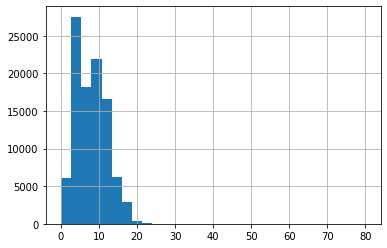

In [20]:
seq_len = [len(i.split()) for i in df['Tweet_text']]

pd.Series(seq_len).hist(bins = 30)


#Installing BERT for Tensorflow 2.0

In [21]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 40kB 1.5MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.6-cp36-none-any.whl size=30318 sha256=69e8c076009811e09c47e66937b1ca7b5421c798a53e2397913e113ca43ad85a
  Stored in directory: /root/.cache/pip/wheels/07/a0/b4/75b0601ebaa41e517a797fe9cea119c789664c8408f8a74ae9
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7304 sha256=a09ea4606530656bc3b6e177bea26daa15a334590abca9cbec5047459229c7f0
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19475 sha256=b226049bc123c069b048469373b4d869336809a9a37f72712b41d11197caa583
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.1MB 2.7MB/s 


In [22]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

 tensorflow_hub is a place where you can find all the prebuilt and pretrained models developed in TensorFlow. We will be importing and using a built-in BERT model from TF hub.

In [23]:
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

#BERT Tokenizer

In [24]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, lower_case)

In [25]:
tokenizer.tokenize("Stay home Stay safe")

['stay', 'home', 'stay', 'safe']

In [26]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("stay home stay safe"))

[2994, 2188, 2994, 3647]

In [27]:
def tokenize_tweet(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [28]:
tokenized_tweet = [tokenize_tweet(tweet) for tweet in df['Tweet_text']]

#Prerparing Data For Training

In [29]:
tweet_len = [[tweet, df['Sentiment'][i], len(tweet)]
                 for i, tweet in enumerate(tokenized_tweet)]

In [30]:
import random
random.shuffle(tweet_len)

In [31]:
tweet_len.sort(key=lambda x: x[2])

In [32]:
sorted_labels = [(tweet_lab[0], tweet_lab[1]) for tweet_lab in tweet_len]

Chaning in to TensorFlow 2.0-compliant input dataset shape.

In [33]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_labels, output_types=(tf.int32, tf.int32))

#Padding

In [34]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [35]:
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 1), dtype=int32, numpy=
 array([[   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [6289],
        [8510],
        [3103],
        [3407]], dtype=int32)>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int32)>)

#Splitting of Data

In [44]:
math.ceil(len(sorted_labels) / BATCH_SIZE)//10

312

In [45]:
t2=batched_dataset.take(TEST_BATCHES)
t3=batched_dataset.take(TEST_BATCHES)

TypeError: ignored

In [36]:
import math
TOTAL_BATCHES = math.ceil(len(sorted_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

#Creating the Model

In [37]:
class model(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(model, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

parameters of  model

In [38]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2


In [39]:
text_model = model(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [41]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

#Fitting of Model

In [42]:
text_model.fit(train_data, epochs=5)

Epoch 1/5
2813/2813 [==============================] - 217s 77ms/step - loss: 0.5204 - accuracy: 0.7393
Epoch 2/5
2813/2813 [==============================] - 217s 77ms/step - loss: 0.3758 - accuracy: 0.8322
Epoch 3/5
2813/2813 [==============================] - 218s 77ms/step - loss: 0.1838 - accuracy: 0.9264
Epoch 4/5
2813/2813 [==============================] - 218s 78ms/step - loss: 0.1068 - accuracy: 0.9592
Epoch 5/5
2813/2813 [==============================] - 219s 78ms/step - loss: 0.0823 - accuracy: 0.9688


#Evalauting Model on Test data

In [ ]:
results = text_model.evaluate(test_data)
print(results)

InvalidArgumentError: ignored

In [ ]:
sent1='This movie is awesome'
token=tokenize_tweet(sent1)
input=tf.expand_dims(token,0)

In [ ]:
output=text_model(input,training=False)

In [ ]:
import numpy as np

sentiment=np.round(output)
if sentiment==0:
  print('Sentiment is Negative:',sentiment)
elif sentiment==1:
  print('Sentiment is Positive:',output)

Sentiment is Positive: tf.Tensor([[0.99997735]], shape=(1, 1), dtype=float32)


#Thank you